In [1]:
import numpy as np
import pandas as pd


In [2]:

import seaborn as sns
import matplotlib.pyplot as plt


In [3]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
import os
os.chdir(r'C:\Users\User\Desktop\data science project\healthcare\kidney')

In [6]:
df = pd.read_csv('kidney_disease.csv')

df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
df.shape

(400, 26)

In [9]:
df.describe

<bound method NDFrame.describe of       id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes 

In [13]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [15]:
df=df.drop('id',axis=1)

In [16]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,0.0,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,0.0,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,0.0,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
lb=LabelEncoder()

In [7]:
df["classification"].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [8]:
df["rbc"].value_counts()

normal      201
abnormal     47
Name: rbc, dtype: int64

In [20]:
df["classification"]=df["classification"].replace({
    "ckd":0,"notckd":1,"ckd\t":0})

In [21]:
df["rbc"]=df["rbc"].replace({
    "normal":0,"abnormal":1})

TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

In [22]:
df["rbc"].value_counts()

0.0    201
1.0     47
Name: rbc, dtype: int64

In [23]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,0.0,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,0.0,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,0.0,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,0


In [24]:
df["classification"].value_counts()

0    250
1    150
Name: classification, dtype: int64

In [25]:
import pycaret

In [26]:
data = df.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = df.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (380, 25)
Unseen Data For Predictions: (20, 25)


In [27]:
from pycaret.classification import *
model1 = setup(data = df, target = 'classification', session_id=123)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(400, 25)"
4,Missing Values,True
5,Numeric Features,8
6,Categorical Features,16
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [29]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.9964,1,0.9909,1,0.9952,0.9924
1,CatBoost Classifier,0.9964,1,0.9909,1,0.9952,0.9924
2,Light Gradient Boosting Machine,0.9929,1,0.9909,0.9917,0.9909,0.985
3,Random Forest Classifier,0.9893,1,0.9709,1,0.9847,0.9765
4,Ada Boost Classifier,0.9857,1,1,0.9672,0.9826,0.9705
5,Gradient Boosting Classifier,0.9857,0.9994,0.9618,1,0.9799,0.9689
6,Extra Trees Classifier,0.9857,0.9995,0.9718,0.9909,0.9809,0.9695
7,Logistic Regression,0.9821,0.9989,0.9709,0.9833,0.976,0.9617
8,Decision Tree Classifier,0.9749,0.9724,0.9618,0.9718,0.9657,0.9459
9,Ridge Classifier,0.9677,0,0.9727,0.9483,0.9588,0.9323


In [30]:
dt = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0000,1.0,1.0000,1.0,1.0000,1.0000
1,0.9643,1.0,0.9000,1.0,0.9474,0.9205
2,0.9643,1.0,0.9000,1.0,0.9474,0.9205
3,1.0000,1.0,1.0000,1.0,1.0000,1.0000
4,1.0000,1.0,1.0000,1.0,1.0000,1.0000
5,1.0000,1.0,1.0000,1.0,1.0000,1.0000
6,0.9643,1.0,0.9091,1.0,0.9524,0.9239
7,1.0000,1.0,1.0000,1.0,1.0000,1.0000
8,1.0000,1.0,1.0000,1.0,1.0000,1.0000
9,1.0000,1.0,1.0000,1.0,1.0000,1.0000


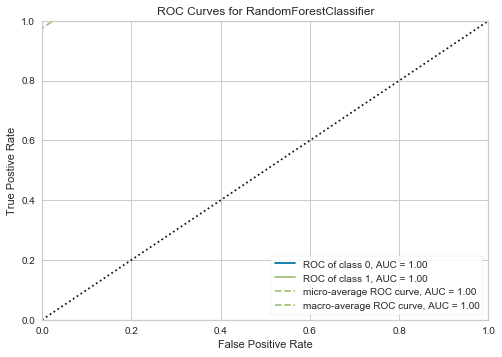

In [34]:
plot_model(dt,plot = 'auc')

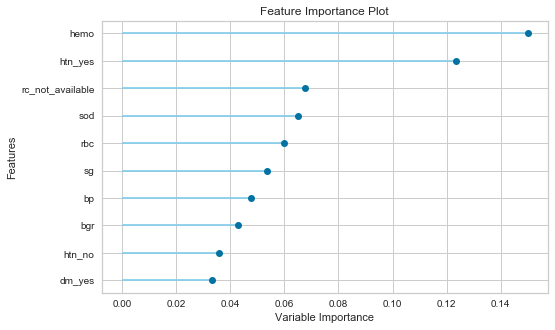

In [35]:
plot_model(dt, plot='feature')

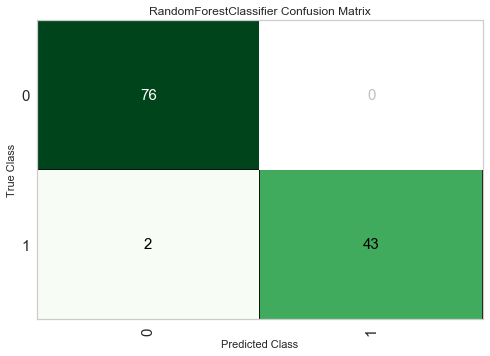

In [36]:
plot_model(dt, plot = 'confusion_matrix')

In [38]:
predict_model(dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.9835,1.0,0.9556,1.0,0.9773,0.9643


,age,bp,sg,al,su,rbc,bgr,bu,sc,sod,...,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes,classification,Label,Score
0,51.0,100.000000,1.015000,2.000000,0.000000,0.000000,93.000000,20.000000,1.600000,146.000000,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0,0,0.1
1,35.0,80.000000,1.005000,3.000000,0.000000,1.000000,148.036517,57.425722,3.072454,137.528754,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0,0,0.0
2,23.0,80.000000,1.025000,0.000000,0.000000,0.000000,70.000000,36.000000,1.000000,150.000000,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,1,1.0
3,66.0,70.000000,1.020000,0.000000,0.000000,0.000000,94.000000,19.000000,0.700000,135.000000,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,1,1.0
4,53.0,100.000000,1.010000,1.000000,3.000000,1.000000,213.000000,23.000000,1.000000,139.000000,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0,0.0
5,48.0,80.000000,1.025000,0.000000,0.000000,0.000000,122.000000,33.000000,0.900000,146.000000,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,1,1.0
6,29.0,70.000000,1.020000,0.000000,0.000000,0.000000,127.000000,44.000000,1.200000,145.000000,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,1,0.7
7,56.0,90.000000,1.010000,4.000000,1.000000,0.000000,176.000000,309.000000,13.300000,124.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,0,0.1
8,61.0,90.000000,1.010000,1.000000,1.000000,0.189516,159.000000,39.000000,1.500000,133.000000,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0,0,0.0
9,68.0,80.000000,1.015000,0.000000,0.000000,0.189516,171.000000,30.000000,1.000000,137.528754,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0,0.2


In [39]:
unseen_predictions = predict_model(dt, data=data_unseen)
unseen_predictions.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,rc,htn,dm,cad,appet,pe,ane,classification,Label,Score
0,59.0,60.0,1.020,0.0,0.0,0.0,normal,notpresent,notpresent,113.0,...,4.9,no,no,no,good,no,no,1,1,1.0
1,71.0,70.0,1.025,0.0,0.0,NaN,NaN,notpresent,notpresent,79.0,...,5.9,no,no,no,good,no,no,1,1,1.0
2,48.0,80.0,1.025,0.0,0.0,0.0,normal,notpresent,notpresent,75.0,...,6.5,no,no,no,good,no,no,1,1,1.0
3,80.0,80.0,1.025,0.0,0.0,0.0,normal,notpresent,notpresent,119.0,...,5.0,no,no,no,good,no,no,1,1,1.0
4,57.0,60.0,1.020,0.0,0.0,0.0,normal,notpresent,notpresent,132.0,...,4.5,no,no,no,good,no,no,1,1,1.0


In [40]:
save_model(dt,'decision_tree_kidney')

Transformation Pipeline and Model Succesfully Saved
